# PROJETO MARKETING GEEKWEAR

*Quero ver:*
- Se meus anúncios estão funcionando. # DE QUAIS ANUNCIOS VIERAM AS MAIORES VENDAS
- De onde meus melhores leads/vendas estão vindo. # DE QUAIS CAMPANHAS VIERAM AS MAIORES VENDAS?
- Se estou gastando dinheiro à toa em campanhas que não convertem. # VERIFICAR AS CONVERSÕES POR CAMPANHA
- Como vender mais com menos custo. # QUAIS OS PUBLICOS QUE MAIS CONVERTEM

*Quero acessar:*
- Um Dashboard visual, rápido, sem precisar instalar nada. 
- Um Relatório mensal ou quinzenal com insights claros.
- Se possível, alertas automáticos para campanhas muito ruins ou boas.

*Quero recomendações:*
- "Invista mais em tal campanha."
- "Pare de gastar com essa aqui."
- "Ofereça produto X para público Y."
- "Esse lead tem alta chance de comprar — atacar rápido."

*Indicadores importantes:*
- CAC (Custo de Aquisição de Cliente)
- Tempo médio de conversão
- Taxa de conversão por campanha / canal
- Receita gerada por campanha
- Retorno sobre investimento (ROI)

*Ferramenta para Visualização:*
- Power BI (acesso via link público, fácil) ou Google Looker Studio (grátis e fácil)

*Exemplos de perguntas inteligentes que o cliente poderia responder com o seu projeto:*
- Quais campanhas geram mais vendas e menos CAC?
- Qual o tempo médio que um lead demora para comprar?
- De quais canais vêm os leads de melhor qualidade?
- Onde estou gastando dinheiro sem retorno?
- Quais leads devo atacar primeiro?
- Quanto posso investir a mais na campanha que tem ROI positivo?

*Relatório de Insights:*
- Melhor campanha do mês.
- Campanha que teve lead barato mas não vendeu.
- Lead com maior tempo parado sem vender (potencial abandono).

*Formato:*
-Resumo simples (ex: 1 página ou bullets).
- Entregue via PDF ou link do Notion.

# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
df_ads = pd.read_csv('data/raw/metaads_data.csv', index_col=0)
df_crm = pd.read_csv('data/raw/crm_sales_data.csv', index_col=0)

# 1. Descrição dos Dados

## Data Shape

In [3]:
print(f'Numero de Linhas De cada Dataset:')
print(f'META ADS: {df_ads.shape[0]}')
print(f'CRM LEADS: {df_crm.shape[0]}')

print(f'Numero de Colunas De cada Dataset:')
print(f'META ADS: {df_ads.shape[1]}')
print(f'CRM LEADS: {df_crm.shape[1]}')

Numero de Linhas De cada Dataset:
META ADS: 1000
CRM LEADS: 315
Numero de Colunas De cada Dataset:
META ADS: 14
CRM LEADS: 22


## Data Types

In [4]:
df_ads['data'] = pd.to_datetime(df_ads['data'])

In [5]:
print("ADS DATA:")
print(df_ads.dtypes)

ADS DATA:
campanha                    object
conjunto_anuncio            object
anuncio                     object
impressoes                   int64
cliques                      int64
gasto_total                float64
ctr (%)                    float64
cpc (R$)                   float64
conversões                   int64
cpa (R$)                   float64
Receita                    float64
roas                       float64
data                datetime64[ns]
dia_da_semana               object
dtype: object


In [6]:
# DATA
df_crm['ultima_interacao'] = pd.to_datetime(df_crm['ultima_interacao'])
df_crm['data_captura'] = pd.to_datetime(df_crm['data_captura'])
df_crm['data_venda'] = pd.to_datetime(df_crm['data_venda'])

# NUMERICO
df_crm['quantidade'] = df_crm['quantidade'].fillna(0).astype('int32')
df_crm['quantidade'].astype('int32');

In [7]:
print("CRM DATA:")
print(df_crm.dtypes)

CRM DATA:
lead_id                        object
nome                           object
email                          object
telefone                       object
data_captura           datetime64[ns]
campanha_origem                object
ad_clicked                     object
canal_origem                   object
etapa_funil                    object
ultima_interacao       datetime64[ns]
status                         object
pontuacao                     float64
sale_id                        object
data_venda             datetime64[ns]
produto                        object
valor_total                   float64
quantidade                      int32
meio_pagamento                 object
status_pagamento               object
utm_source                     object
utm_campaign                   object
dias_para_conversao           float64
dtype: object


## Data Columns

In [8]:
print("ADS DATA:")
print(df_ads.columns)
print('----------------------------------------------------------------------------------------------------')
print("CRM DATA:")
print(df_crm.columns)

ADS DATA:
Index(['campanha', 'conjunto_anuncio', 'anuncio', 'impressoes', 'cliques',
       'gasto_total', 'ctr (%)', 'cpc (R$)', 'conversões', 'cpa (R$)',
       'Receita', 'roas', 'data', 'dia_da_semana'],
      dtype='object')
----------------------------------------------------------------------------------------------------
CRM DATA:
Index(['lead_id', 'nome', 'email', 'telefone', 'data_captura',
       'campanha_origem', 'ad_clicked', 'canal_origem', 'etapa_funil',
       'ultima_interacao', 'status', 'pontuacao', 'sale_id', 'data_venda',
       'produto', 'valor_total', 'quantidade', 'meio_pagamento',
       'status_pagamento', 'utm_source', 'utm_campaign',
       'dias_para_conversao'],
      dtype='object')


## Checando Nulos

In [9]:
df_ads.isnull().sum()

campanha            0
conjunto_anuncio    0
anuncio             0
impressoes          0
cliques             0
gasto_total         0
ctr (%)             0
cpc (R$)            0
conversões          0
cpa (R$)            0
Receita             0
roas                0
data                0
dia_da_semana       0
dtype: int64

In [10]:
print("4 PESSOAS VIERAM DE TRAFEGO DIRETO E NÃO POSSUM 'lead_id.'")

print("265 PESSOAS POSSUEM 'lead_id', MAS NÃO CONVERTERAM EM COMPRA")

df_crm.isnull().sum()

4 PESSOAS VIERAM DE TRAFEGO DIRETO E NÃO POSSUM 'lead_id.'
265 PESSOAS POSSUEM 'lead_id', MAS NÃO CONVERTERAM EM COMPRA


lead_id                  4
nome                     4
email                    4
telefone                 4
data_captura             4
campanha_origem          4
ad_clicked               4
canal_origem             4
etapa_funil              4
ultima_interacao         4
status                   4
pontuacao                4
sale_id                265
data_venda             265
produto                265
valor_total            265
quantidade               0
meio_pagamento         265
status_pagamento       265
utm_source             265
utm_campaign           265
dias_para_conversao    269
dtype: int64

# 2 Feature Engineering

In [11]:
# DIAS ATÉ A CONVERSÃO  
df_crm['dias_para_conversao'] = (df_crm['data_venda'] - df_crm['data_captura']).dt.days

In [12]:
taxa_campanha = df_ads.groupby('campanha').agg({
    'cliques': 'sum',
    'impressoes': 'sum',
    'conversões': 'sum',
    'gasto_total': 'sum'}).reset_index()

taxa_campanha['taxa_conversao (%)'] = (taxa_campanha['conversões'] / taxa_campanha['cliques'] * 100).round(2)
taxa_conversao = taxa_campanha['taxa_conversao (%)'].mean()

In [12]:
# Separar a coluna 'conjunto_anuncio' em duas colunas: 'Sexo' e 'Idade'
df_ads[['sexo', 'idade']] = df_ads['conjunto_anuncio'].str.extract(r'(?P<Sexo>\w+)\s(?P<Idade>\d{2}-\d{2})')

# 3 Métricas Chave

In [42]:
# Configuração dos gráficos
%matplotlib inline
sns.set(style="whitegrid")

## Resultado das Campanhas

In [43]:
# Métricas agrupadas por campanha e publico
campanha = df_ads.groupby('campanha').agg({
    'impressoes': 'sum',
    'cliques': 'sum',
    'gasto_total': 'sum',                       
    'conversões': 'sum',                               
    'anuncio': 'count'
}).reset_index().rename(columns={'anuncio': 'dias_campanha'})

# Métricas agrupadas por campanha e publico
campanha_publico = df_ads.groupby(['campanha', 'conjunto_anuncio']).agg({
    'impressoes': 'sum',
    'cliques': 'sum',
    'gasto_total': 'sum',                       
    'conversões': 'sum',                               
    'anuncio': 'count'
}).reset_index().rename(columns={'anuncio': 'dias_campanha'})


# Métricas agrupadas por campanha e anuncio
campanha_anuncio = df_ads.groupby(['campanha', 'anuncio']).agg({
    'impressoes': 'sum',
    'cliques': 'sum',
    'gasto_total': 'sum',                       
    'conversões': 'sum',                               
    'conjunto_anuncio': 'count'
}).reset_index().rename(columns={'conjunto_anuncio': 'dias_campanha'})

In [44]:
#CAMPANHA PUBLICO

# CTR (%)
campanha['CTR(%)'] = np.round((campanha['cliques'] / campanha['impressoes']) * 100, 2)

# CPC (R$)
campanha['CPC(R$)'] =np.round(campanha['gasto_total'] / campanha['cliques'], 2)

# CPA (R$)
campanha['CPA(R$)'] = np.round(campanha['gasto_total'] / campanha['conversões'], 2)

# ROAS
#campanha_metrics['ROAS'] = np.round(campanha_metrics['Receita'] / campanha_metrics['gasto_total'], 2)




#CAMPANHA PUBLICO

# CTR (%)
campanha_publico['CTR(%)'] = np.round((campanha_publico['cliques'] / campanha_publico['impressoes']) * 100, 2)

# CPC (R$)
campanha_publico['CPC(R$)'] =np.round(campanha_publico['gasto_total'] / campanha_publico['cliques'], 2)

# CPA (R$)
campanha_publico['CPA(R$)'] = np.round(campanha_publico['gasto_total'] / campanha_publico['conversões'], 2)

# ROAS
#campanha_metrics['ROAS'] = np.round(campanha_metrics['Receita'] / campanha_metrics['gasto_total'], 2)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------

#CAMPANHA ANUNCIO

# CTR (%)
campanha_anuncio['CTR(%)'] = np.round((campanha_anuncio['cliques'] / campanha_anuncio['impressoes']) * 100, 2)

# CPC (R$)
campanha_anuncio['CPC(R$)'] =np.round(campanha_anuncio['gasto_total'] / campanha_anuncio['cliques'], 2)

# CPA (R$)
campanha_anuncio['CPA(R$)'] = np.round(campanha_anuncio['gasto_total'] / campanha_anuncio['conversões'], 2)

# ROAS
#campanha_metrics['ROAS'] = np.round(campanha_metrics['Receita'] / campanha_metrics['gasto_total'], 2)

In [45]:
#campanha_publico.to_csv("data/tratados/campanha_publico.csv")
#campanha_anuncio.to_csv("data/tratados/campanha_anuncio.csv")
#campanha.to_csv("data/tratados/campanha_geral.csv")

## Vendas e Leads

### Por Campanha

In [46]:
## CAMPANHA VENDAS
campanha_vendas = df_crm.groupby('campanha_origem').agg({
    'lead_id': 'count',
    'status': lambda x: (x == 'Ganhou').sum(),
    'sale_id': 'count',
    'valor_total': 'sum'
}).reset_index()


# Taxa de Conversão por Campanha
campanha_vendas.columns = ['campanha_origem', 'leads', 'vendas_leads', 'vendas', 'receita_total']
campanha_vendas['taxa_conversao'] = np.round((campanha_vendas['vendas'] / campanha_vendas['leads']) * 100, 2)

display(campanha_vendas.sort_values(by='taxa_conversao', ascending=False))

,campanha_origem,leads,vendas_leads,vendas,receita_total,taxa_conversao
2,Camisetas Series,119,20,24,5784.22,20.17
1,Camisetas Filmes,158,18,19,4955.76,12.03
0,Blusas Inverno,34,3,3,707.67,8.82


In [47]:
#campanha_vendas.to_csv('data/tratados/campanha_vendas.csv')

In [48]:
# Agrupando por campanha e etapa do funil
campanha_funil = df_crm.groupby(['campanha_origem', 'etapa_funil'])['lead_id'].count().reset_index()
campanha_funil = campanha_funil.rename(columns={'lead_id': 'qtd_leads'})

# Total de leads por campanha
totais = campanha_funil.groupby('campanha_origem')['qtd_leads'].transform('sum')

# Percentual por etapa
campanha_funil['percentual'] = (campanha_funil['qtd_leads'] / totais) * 100
campanha_funil['percentual'] = campanha_funil['percentual'].round(2)

# Visualizando o resultado
display(campanha_funil.sort_values(by=['campanha_origem', 'etapa_funil']))

,campanha_origem,etapa_funil,qtd_leads,percentual
0,Blusas Inverno,Carrinho,7,20.59
1,Blusas Inverno,Checkout,7,20.59
2,Blusas Inverno,Comprou,3,8.82
3,Blusas Inverno,Visita,17,50.00
4,Camisetas Filmes,Carrinho,43,27.22
5,Camisetas Filmes,Checkout,31,19.62
6,Camisetas Filmes,Comprou,19,12.03
7,Camisetas Filmes,Visita,65,41.14
8,Camisetas Series,Carrinho,38,31.93
9,Camisetas Series,Checkout,18,15.13


In [49]:
#campanha_funil.to_csv('data/tratados/campanha_funil.csv')

### Por Canal de Origem

In [50]:
# 1. Total de leads por canal
total_leads_por_canal = df_crm.groupby('canal_origem')['lead_id'].count().rename('total_leads')

# 2. Total de leads que compraram por canal
compraram_por_canal = df_crm[df_crm['etapa_funil'] == 'Comprou'].groupby('canal_origem')['lead_id'].count().rename('compraram')

# 3. Juntando os dois
conversao_canal = pd.concat([total_leads_por_canal, compraram_por_canal], axis=1).fillna(0)

# 4. Taxa de conversão (%)
conversao_canal['taxa_conversao_%'] = np.round((conversao_canal['compraram'] / conversao_canal['total_leads']) * 100, 2)

# 5. Ordenar por taxa de conversão
conversao_canal = conversao_canal.sort_values(by='taxa_conversao_%', ascending=False)

# 6. Visualizar
conversao_canal.reset_index()

,canal_origem,total_leads,compraram,taxa_conversao_%
0,Email,20,6,30.00
1,Facebook,79,14,17.72
2,Google,78,10,12.82
3,Instagram,90,11,12.22
4,Tráfego Direto,44,5,11.36


In [51]:
#conversao_canal.to_csv('data/tratados/canal_conversao.csv')

# 4. Análise Exploratória

## Campanhas Geral

### Impressões e Cliques

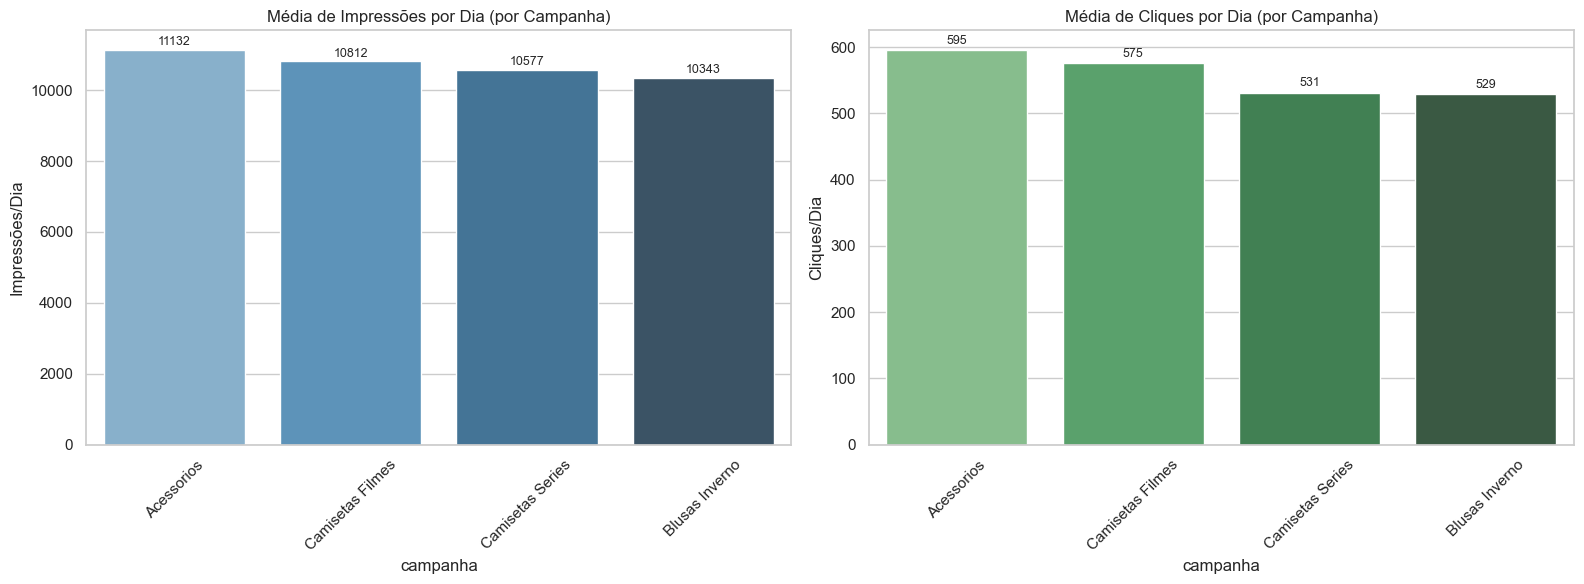

In [53]:
# Calculando impressões e cliques médios por campanha por dia
campanha['impressoes_dia'] = campanha['impressoes'] / campanha['dias_campanha']
campanha['cliques_dia'] = campanha['cliques'] / campanha['dias_campanha']

# Ordenar por maior valor para visualização clara
df_imp = campanha.sort_values('impressoes_dia', ascending=False)
df_clk = campanha.sort_values('cliques_dia', ascending=False)

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1 - Impressões por dia
sns.barplot(data=df_imp, x='campanha', y='impressoes_dia', hue='campanha', ax=axes[0], palette='Blues_d')
axes[0].set_title('Média de Impressões por Dia (por Campanha)')
axes[0].set_ylabel('Impressões/Dia')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(df_imp['impressoes_dia']):
    axes[0].text(i, v + 50, f'{v:.0f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2 - Cliques por dia
sns.barplot(data=df_clk, x='campanha', y='cliques_dia', hue='campanha', ax=axes[1], palette='Greens_d')
axes[1].set_title('Média de Cliques por Dia (por Campanha)')
axes[1].set_ylabel('Cliques/Dia')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(df_clk['cliques_dia']):
    axes[1].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontsize=9)

# Ajustar layout
plt.tight_layout()
plt.show()


### Gasto total

In [54]:
campanha['gasto_dia'] = campanha['gasto_total'] / campanha['dias_campanha']

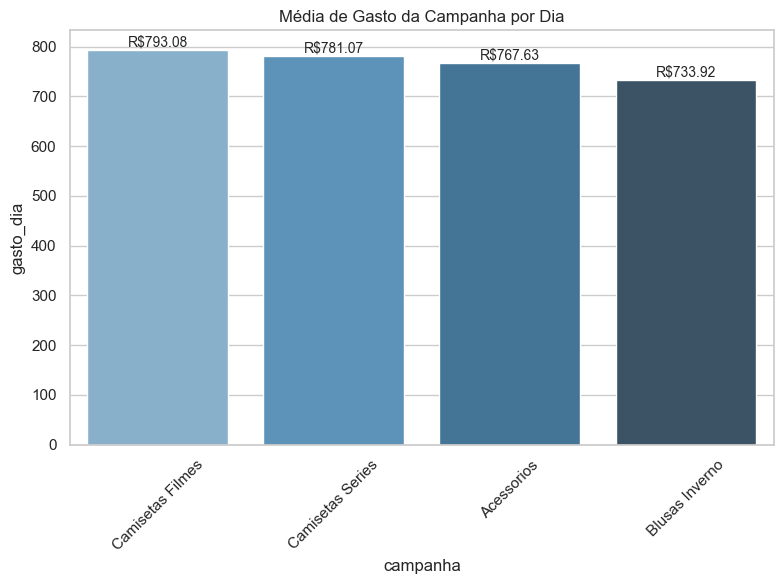

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))  # apenas 1 subplot

aux = campanha.sort_values(by='gasto_dia', ascending=False)
sns.barplot(data=aux, x='campanha', y='gasto_dia', hue='campanha', ax=ax, palette='Blues_d')

ax.set_title('Média de Gasto da Campanha por Dia')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(aux['gasto_dia']):
    ax.text(i, v + 0.5, f'R${v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### CTR, CPC, CPA

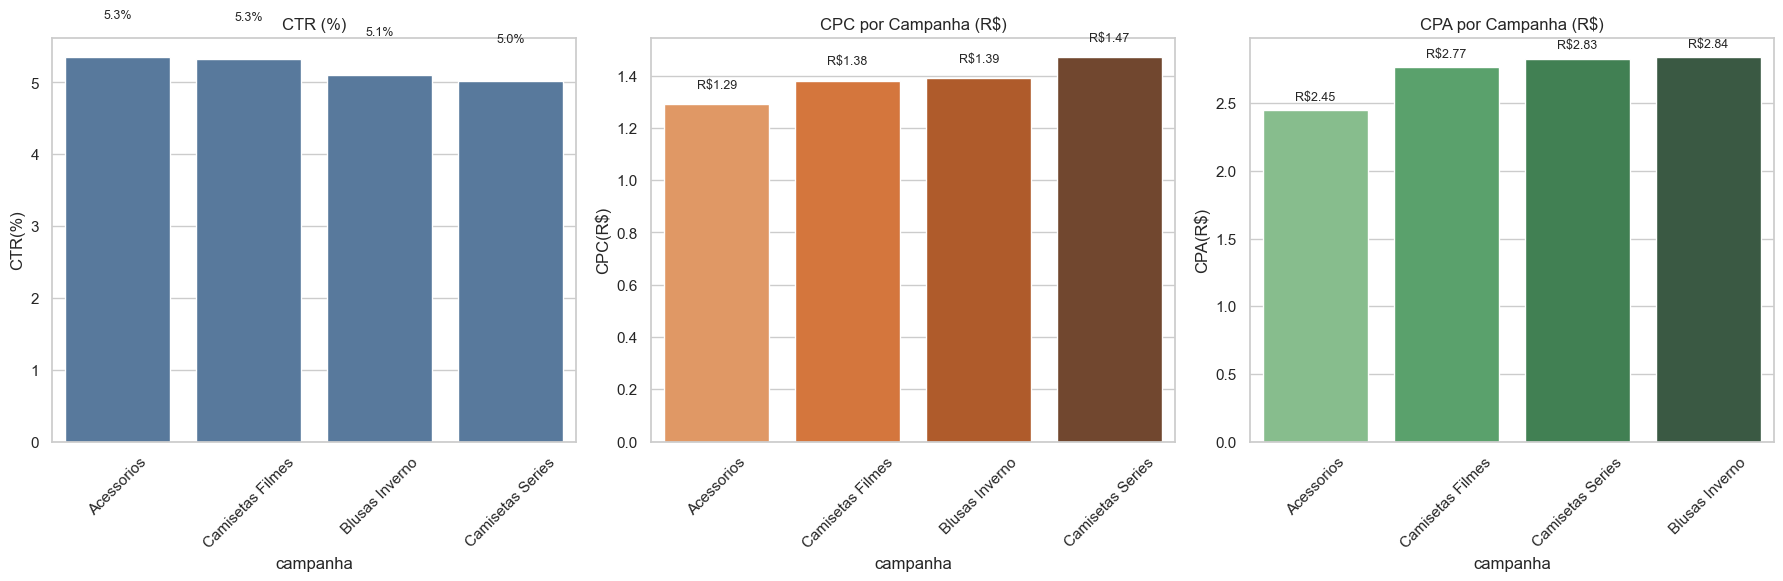

In [56]:
# Ajustar tamanho geral
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1 - CTR (%)
df_ctr = campanha.sort_values(by='CTR(%)', ascending=False)
sns.barplot(data=df_ctr, x='campanha', y='CTR(%)', ax=axes[0], color='#4c78a8')
axes[0].set_title('CTR (%)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(df_ctr['CTR(%)']):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

# Subplot 2 - CPC (menor para maior)
df_cpc = campanha.sort_values(by='CPC(R$)', ascending=True)
sns.barplot(data=df_cpc, x='campanha', y='CPC(R$)', ax=axes[1], hue='campanha', palette='Oranges_d')
axes[1].set_title('CPC por Campanha (R$)')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(df_cpc['CPC(R$)']):
    axes[1].text(i, v + 0.05, f'R${v:.2f}', ha='center', va='bottom', fontsize=9)

# Subplot 3 - CPA (menor para maior)
df_cpa = campanha.sort_values(by='CPA(R$)', ascending=True)
sns.barplot(data=df_cpa, x='campanha', y='CPA(R$)', hue='campanha', ax=axes[2], palette='Greens_d')
axes[2].set_title('CPA por Campanha (R$)')
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(df_cpa['CPA(R$)']):
    axes[2].text(i, v + 0.05, f'R${v:.2f}', ha='center', va='bottom', fontsize=9)

# Ajustar espaçamento
plt.tight_layout()
plt.show()

### Funil de Vendas

# Save Datasets

In [80]:
campanha

,campanha,impressoes,cliques,gasto_total,conversões,dias_campanha,CTR(%),CPC(R$),CPA(R$),impressoes_dia,cliques_dia,gasto_dia
0,Acessorios,1146610,61325,79066.14,32284,103,5.35,1.29,2.45,11132.135922,595.388350,767.632427
1,Blusas Inverno,1944572,99389,137977.34,48660,188,5.11,1.39,2.84,10343.468085,528.664894,733.922021
2,Camisetas Filmes,4670706,248605,342610.61,123755,432,5.32,1.38,2.77,10811.819444,575.474537,793.080116
3,Camisetas Series,2929864,147047,216356.50,76375,277,5.02,1.47,2.83,10577.126354,530.855596,781.070397


In [76]:
df_ads.to_csv('data/tratados/metaads_data.csv')
df_crm.to_csv('data/tratados/crm_sales_data.csv')

campanha.to_csv('data/tratados/campanha_geral.csv')

In [94]:
campanha

,campanha,impressoes,cliques,gasto_total,conversões,dias_campanha,CTR(%),CPC(R$),CPA(R$),impressoes_dia,cliques_dia,gasto_dia
0,Acessorios,1146610,61325,79066.14,32284,103,5.35,1.29,2.45,11132.135922,595.388350,767.632427
1,Blusas Inverno,1944572,99389,137977.34,48660,188,5.11,1.39,2.84,10343.468085,528.664894,733.922021
2,Camisetas Filmes,4670706,248605,342610.61,123755,432,5.32,1.38,2.77,10811.819444,575.474537,793.080116
3,Camisetas Series,2929864,147047,216356.50,76375,277,5.02,1.47,2.83,10577.126354,530.855596,781.070397
